# Objective

The objective of the dataset is to diagnostically predict on IPL matches 2008-2020

## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## To read the data

In [3]:
d=pd.read_csv('IPL.csv')

In [4]:
d

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,NaN,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi


## To find No of rows & columns

In [4]:
d.shape

(816, 17)

## Data type

In [5]:
d.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

## To check what are all the columns we have

In [6]:
d.columns

Index(['id', 'city', 'date', 'player_of_match', 'venue', 'neutral_venue',
       'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'eliminator', 'method', 'umpire1', 'umpire2'],
      dtype='object')

# Clean the Data

## To check Null values

In [7]:
d.isnull()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False
812,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
813,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
814,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [8]:
d.isnull().sum()

id                   0
city                13
date                 0
player_of_match      4
venue                0
neutral_venue        0
team1                0
team2                0
toss_winner          0
toss_decision        0
winner               4
result               4
result_margin       17
eliminator           4
method             797
umpire1              0
umpire2              0
dtype: int64

In [9]:
d.isnull().sum().sum()

843

In [10]:
d.shape

(816, 17)

In [13]:
d.isnull().sum()

id                  0
city               13
date                0
player_of_match     4
venue               0
neutral_venue       0
team1               0
team2               0
toss_winner         0
toss_decision       0
winner              4
result              4
result_margin      17
eliminator          4
umpire1             0
umpire2             0
dtype: int64

In [14]:
d.dropna(axis=0,inplace=True)

In [16]:
d.isnull().sum()

id                 0
city               0
date               0
player_of_match    0
venue              0
neutral_venue      0
team1              0
team2              0
toss_winner        0
toss_decision      0
winner             0
result             0
result_margin      0
eliminator         0
umpire1            0
umpire2            0
dtype: int64

In [15]:
d


,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,C Shamshuddin,RK Illingworth
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi


## Drop unwanted columns

In [8]:
d=d.drop(['method'],axis=1)

In [9]:
d

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,Nitin Menon,PR Reiffel
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi


In [10]:
d.drop(['id','neutral_venue'],axis=1,inplace=True)

In [11]:
d.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


## To collect Top & Bottom data

In [17]:
d.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [18]:
d.head(10)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,IL Howell,AM Saheba
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,DJ Harper,GA Pratapkumar
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,Asad Rauf,MR Benson
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,Aleem Dar,AM Saheba


In [19]:
d.tail()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,C Shamshuddin,RK Illingworth
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,CB Gaffaney,Nitin Menon
813,1237178,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,0,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,PR Reiffel,S Ravi
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,PR Reiffel,S Ravi
815,1237181,Dubai,2020-11-10,TA Boult,Dubai International Cricket Stadium,0,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,CB Gaffaney,Nitin Menon


## Basic info about the data

In [20]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               786 non-null    int64  
 1   city             786 non-null    object 
 2   date             786 non-null    object 
 3   player_of_match  786 non-null    object 
 4   venue            786 non-null    object 
 5   neutral_venue    786 non-null    int64  
 6   team1            786 non-null    object 
 7   team2            786 non-null    object 
 8   toss_winner      786 non-null    object 
 9   toss_decision    786 non-null    object 
 10  winner           786 non-null    object 
 11  result           786 non-null    object 
 12  result_margin    786 non-null    float64
 13  eliminator       786 non-null    object 
 14  umpire1          786 non-null    object 
 15  umpire2          786 non-null    object 
dtypes: float64(1), int64(2), object(13)
memory usage: 104.4+ KB


## Statistical info

In [35]:
d.describe()

,result_margin
count,786.000000
mean,17.418575
std,22.120149
min,1.000000
25%,6.000000
50%,8.000000
75%,20.000000
max,146.000000


In [36]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
result_margin,786.0,17.418575,22.120149,1.0,6.0,8.0,20.0,146.0


In [23]:
d.duplicated().sum()

0

In [24]:
d.sample(4)

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
551,980969,Bangalore,2016-05-07,V Kohli,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rising Pune Supergiants,Royal Challengers Bangalore,field,Royal Challengers Bangalore,wickets,7.0,N,CB Gaffaney,BNJ Oxenford
73,392198,Centurion,2009-04-28,YK Pathan,SuperSport Park,1,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,bat,Rajasthan Royals,wickets,5.0,N,GAV Baxter,RE Koertzen
263,548321,Delhi,2012-04-19,KP Pietersen,Feroz Shah Kotla,0,Delhi Daredevils,Deccan Chargers,Deccan Chargers,bat,Delhi Daredevils,wickets,5.0,N,BF Bowden,SK Tarapore
544,980955,Rajkot,2016-05-01,AR Patel,Saurashtra Cricket Association Stadium,0,Gujarat Lions,Kings XI Punjab,Gujarat Lions,field,Kings XI Punjab,runs,23.0,N,BNJ Oxenford,VK Sharma


In [25]:
d.nunique()

id                 786
city                32
date               578
player_of_match    232
venue               36
neutral_venue        2
team1               15
team2               15
toss_winner         15
toss_decision        2
winner              15
result               2
result_margin       90
eliminator           1
umpire1             48
umpire2             47
dtype: int64

In [28]:
d.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


## Rename the columns

In [12]:
d.rename(columns={'toss_decision':'decision'},inplace=True)

In [13]:
d.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,umpire1,umpire2
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan


In [39]:
d['result'].value_counts()

wickets    427
runs       359
Name: result, dtype: int64

In [40]:
d.sort_values(by=['city'])

,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,umpire1,umpire2
796,Abu Dhabi,2020-09-29,Rashid Khan,Sheikh Zayed Stadium,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,Sunrisers Hyderabad,runs,15.0,N,VK Sharma,S Ravi
756,Abu Dhabi,2020-09-19,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,CB Gaffaney,VK Sharma
793,Abu Dhabi,2020-10-11,Q de Kock,Sheikh Zayed Stadium,Delhi Capitals,Mumbai Indians,Delhi Capitals,bat,Mumbai Indians,wickets,5.0,N,CB Gaffaney,S Ravi
758,Abu Dhabi,2020-10-21,Mohammed Siraj,Sheikh Zayed Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Royal Challengers Bangalore,wickets,8.0,N,VK Sharma,S Ravi
790,Abu Dhabi,2020-10-16,Q de Kock,Sheikh Zayed Stadium,Kolkata Knight Riders,Mumbai Indians,Kolkata Knight Riders,bat,Mumbai Indians,wickets,8.0,N,CB Gaffaney,VK Sharma
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,Visakhapatnam,2015-04-16,AM Rahane,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,PG Pathak,S Ravi
477,Visakhapatnam,2015-04-22,DA Warner,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Sunrisers Hyderabad,Kolkata Knight Riders,Kolkata Knight Riders,field,Sunrisers Hyderabad,runs,16.0,N,RK Illingworth,VA Kulkarni
565,Visakhapatnam,2016-05-17,AB Dinda,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Rising Pune Supergiants,Delhi Daredevils,Rising Pune Supergiants,field,Rising Pune Supergiants,runs,19.0,N,Nitin Menon,C Shamshuddin
559,Visakhapatnam,2016-05-13,MP Stoinis,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,Mumbai Indians,Kings XI Punjab,Mumbai Indians,bat,Kings XI Punjab,wickets,7.0,N,HDPK Dharmasena,CK Nandan


In [47]:
d['player_of_match'].nunique()

232

In [48]:
d['player_of_match'].unique()

array(['BB McCullum', 'MEK Hussey', 'MF Maharoof', 'MV Boucher',
       'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden', 'YK Pathan',
       'KC Sangakkara', 'JDP Oram', 'AC Gilchrist', 'SM Katich',
       'MS Dhoni', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 'IK Pathan', 'SM Pollock',
       'Sohail Tanvir', 'S Sreesanth', 'A Nehra', 'SC Ganguly',
       'CRD Fernando', 'L Balaji', 'Shoaib Akhtar', 'A Mishra',
       'DPMD Jayawardene', 'GC Smith', 'DJ Bravo', 'M Ntini',
       'SP Goswami', 'A Kumble', 'KD Karthik', 'JA Morkel', 'P Kumar',
       'Umar Gul', 'SK Raina', 'SR Tendulkar', 'R Dravid', 'DL Vettori',
       'RP Singh', 'M Muralitharan', 'CH Gayle', 'AB de Villiers',
       'RS Bopara', 'PP Ojha', 'TM Dilshan', 'HH Gibbs', 'DP Nannes',
       'JP Duminy', 'Yuvraj Singh', 'SB Jakati', 'JH Kallis', 'G Gambhir',
       'RG Sharma', 'A Singh', 'S Badrinath', 'DR Smith', 'LRPL Taylor',
       'Harbhajan Singh', 'R Bhatia', 'SK Warne', 'B

## Get detail about particular venue

In [49]:
d[d['venue']=='Sheikh Zayed Stadium']

,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,umpire1,umpire2
398,Abu Dhabi,2014-04-16,JH Kallis,Sheikh Zayed Stadium,Mumbai Indians,Kolkata Knight Riders,Kolkata Knight Riders,bat,Kolkata Knight Riders,runs,41.0,N,M Erasmus,RK Illingworth
400,Abu Dhabi,2014-04-18,GJ Maxwell,Sheikh Zayed Stadium,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,Kings XI Punjab,wickets,6.0,N,RK Illingworth,C Shamshuddin
401,Abu Dhabi,2014-04-18,AM Rahane,Sheikh Zayed Stadium,Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,N,BF Bowden,RK Illingworth
405,Abu Dhabi,2014-04-21,SK Raina,Sheikh Zayed Stadium,Chennai Super Kings,Delhi Daredevils,Chennai Super Kings,bat,Chennai Super Kings,runs,93.0,N,RK Illingworth,C Shamshuddin
411,Abu Dhabi,2014-04-26,PV Tambe,Sheikh Zayed Stadium,Rajasthan Royals,Royal Challengers Bangalore,Rajasthan Royals,field,Rajasthan Royals,wickets,6.0,N,HDPK Dharmasena,C Shamshuddin
412,Abu Dhabi,2014-04-26,Sandeep Sharma,Sheikh Zayed Stadium,Kolkata Knight Riders,Kings XI Punjab,Kolkata Knight Riders,field,Kings XI Punjab,runs,23.0,N,HDPK Dharmasena,RK Illingworth
756,Abu Dhabi,2020-09-19,AT Rayudu,Sheikh Zayed Stadium,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,Chennai Super Kings,wickets,5.0,N,CB Gaffaney,VK Sharma
758,Abu Dhabi,2020-10-21,Mohammed Siraj,Sheikh Zayed Stadium,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,bat,Royal Challengers Bangalore,wickets,8.0,N,VK Sharma,S Ravi
761,Abu Dhabi,2020-10-24,CV Varun,Sheikh Zayed Stadium,Kolkata Knight Riders,Delhi Capitals,Delhi Capitals,field,Kolkata Knight Riders,runs,59.0,N,CB Gaffaney,PG Pathak
763,Abu Dhabi,2020-10-28,SA Yadav,Sheikh Zayed Stadium,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Mumbai Indians,wickets,5.0,N,UV Gandhe,CB Gaffaney


## Using groupby

In [55]:
ven_grp = d.groupby('venue')
print(ven_grp)

In [56]:
max_ven = ven_grp['winner','result_margin'].max().sort_values(by='result_margin',ascending=False)
max_ven

,winner,result_margin
venue,,
Feroz Shah Kotla,Sunrisers Hyderabad,146.0
M Chinnaswamy Stadium,Sunrisers Hyderabad,144.0
"Rajiv Gandhi International Stadium, Uppal",Sunrisers Hyderabad,118.0
Himachal Pradesh Cricket Association Stadium,Kings XI Punjab,111.0
Wankhede Stadium,Sunrisers Hyderabad,105.0
Eden Gardens,Sunrisers Hyderabad,102.0
Dubai International Cricket Stadium,Sunrisers Hyderabad,97.0
"MA Chidambaram Stadium, Chepauk",Royal Challengers Bangalore,97.0
Maharashtra Cricket Association Stadium,Royal Challengers Bangalore,97.0


## winners by result margin

In [57]:
n=d.groupby('winner').result_margin.max().sort_values(ascending=False)
n


winner
Mumbai Indians                 146.0
Royal Challengers Bangalore    144.0
Kolkata Knight Riders          140.0
Sunrisers Hyderabad            118.0
Kings XI Punjab                111.0
Rajasthan Royals               105.0
Delhi Daredevils                97.0
Chennai Super Kings             97.0
Deccan Chargers                 82.0
Rising Pune Supergiant          61.0
Delhi Capitals                  59.0
Pune Warriors                   38.0
Rising Pune Supergiants         34.0
Kochi Tuskers Kerala            17.0
Gujarat Lions                    7.0
Name: result_margin, dtype: float64

## player of the match winner

In [58]:
n=d.groupby('winner').player_of_match.max().sort_values(ascending=True)
n


winner
Rising Pune Supergiants                 MS Dhoni
Kochi Tuskers Kerala              P Parameswaran
Pune Warriors                          SPD Smith
Delhi Capitals                           SS Iyer
Gujarat Lions                            V Kohli
Chennai Super Kings                      WP Saha
Deccan Chargers                       WPUJC Vaas
Rising Pune Supergiant         Washington Sundar
Kolkata Knight Riders                  YK Pathan
Mumbai Indians                         YK Pathan
Rajasthan Royals                       YK Pathan
Kings XI Punjab                     Yuvraj Singh
Royal Challengers Bangalore         Yuvraj Singh
Sunrisers Hyderabad                 Yuvraj Singh
Delhi Daredevils                          Z Khan
Name: player_of_match, dtype: object

In [59]:
n=d.groupby('winner').player_of_match.max()
n

winner
Chennai Super Kings                      WP Saha
Deccan Chargers                       WPUJC Vaas
Delhi Capitals                           SS Iyer
Delhi Daredevils                          Z Khan
Gujarat Lions                            V Kohli
Kings XI Punjab                     Yuvraj Singh
Kochi Tuskers Kerala              P Parameswaran
Kolkata Knight Riders                  YK Pathan
Mumbai Indians                         YK Pathan
Pune Warriors                          SPD Smith
Rajasthan Royals                       YK Pathan
Rising Pune Supergiant         Washington Sundar
Rising Pune Supergiants                 MS Dhoni
Royal Challengers Bangalore         Yuvraj Singh
Sunrisers Hyderabad                 Yuvraj Singh
Name: player_of_match, dtype: object

In [60]:
winner_wise = d.groupby('winner')
mean_res = winner_wise['winner','result_margin'].mean().sort_values(by='result_margin',ascending=False)
mean_res


,result_margin
winner,
Mumbai Indians,20.847458
Chennai Super Kings,20.446602
Royal Challengers Bangalore,19.574713
Delhi Capitals,19.352941
Sunrisers Hyderabad,17.063492
Deccan Chargers,17.000000
Kolkata Knight Riders,16.597938
Rising Pune Supergiant,15.400000
Rajasthan Royals,15.379747


In [61]:
pd.crosstab(d['venue'],d['winner'])


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
venue,,,,,,,,,,,,,,,
Barabati Stadium,0,3,0,0,0,1,0,3,0,0,0,0,0,0,0
Brabourne Stadium,1,0,0,0,0,0,0,0,6,0,2,0,0,1,1
Buffalo Park,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0
De Beers Diamond Oval,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0
Dr DY Patil Sports Academy,3,2,0,1,0,0,0,2,5,2,1,0,0,1,0
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium,2,0,1,1,0,1,0,0,2,0,1,0,2,0,3
Dubai International Cricket Stadium,4,0,3,0,0,3,0,2,3,0,1,0,0,3,4
Eden Gardens,5,0,1,1,2,3,1,45,10,0,2,1,0,4,2
Feroz Shah Kotla,6,2,3,27,1,5,1,5,4,1,4,0,1,6,6


In [63]:
d.groupby("decision").winner.value_counts()


decision  winner                     
bat       Chennai Super Kings            53
          Mumbai Indians                 48
          Kolkata Knight Riders          38
          Rajasthan Royals               36
          Royal Challengers Bangalore    31
          Delhi Daredevils               27
          Kings XI Punjab                23
          Sunrisers Hyderabad            21
          Deccan Chargers                14
          Pune Warriors                   9
          Delhi Capitals                  5
          Gujarat Lions                   2
          Rising Pune Supergiants         2
field     Mumbai Indians                 70
          Kings XI Punjab                59
          Kolkata Knight Riders          59
          Royal Challengers Bangalore    56
          Chennai Super Kings            50
          Rajasthan Royals               43
          Sunrisers Hyderabad            42
          Delhi Daredevils               38
          Deccan Chargers             

In [65]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             786 non-null    object 
 1   date             786 non-null    object 
 2   player_of_match  786 non-null    object 
 3   venue            786 non-null    object 
 4   team1            786 non-null    object 
 5   team2            786 non-null    object 
 6   toss_winner      786 non-null    object 
 7   decision         786 non-null    object 
 8   winner           786 non-null    object 
 9   result           786 non-null    object 
 10  result_margin    786 non-null    float64
 11  eliminator       786 non-null    object 
 12  umpire1          786 non-null    object 
 13  umpire2          786 non-null    object 
dtypes: float64(1), object(13)
memory usage: 112.1+ KB


## create a year column

In [66]:
d['year'] = pd.DatetimeIndex(d['date']).year

In [68]:
d.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,umpire1,umpire2,year
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [69]:
d.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 786 entries, 0 to 815
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             786 non-null    object 
 1   date             786 non-null    object 
 2   player_of_match  786 non-null    object 
 3   venue            786 non-null    object 
 4   team1            786 non-null    object 
 5   team2            786 non-null    object 
 6   toss_winner      786 non-null    object 
 7   decision         786 non-null    object 
 8   winner           786 non-null    object 
 9   result           786 non-null    object 
 10  result_margin    786 non-null    float64
 11  eliminator       786 non-null    object 
 12  umpire1          786 non-null    object 
 13  umpire2          786 non-null    object 
 14  year             786 non-null    int64  
dtypes: float64(1), int64(1), object(13)
memory usage: 118.2+ KB


In [70]:
pd.crosstab(d['team1'],d['team2'])

team2,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
team1,,,,,,,,,,,,,,,
Chennai Super Kings,0,7,3,10,0,11,1,10,16,3,13,0,0,11,7
Deccan Chargers,3,0,0,6,0,6,0,6,6,2,6,0,0,4,0
Delhi Capitals,2,0,0,0,0,2,0,1,4,0,3,0,0,2,3
Delhi Daredevils,8,5,0,0,2,12,1,12,11,2,10,1,1,9,6
Gujarat Lions,0,0,0,2,0,2,0,2,1,0,0,1,1,3,3
Kings XI Punjab,11,4,1,10,2,0,0,13,13,3,13,1,1,11,7
Kochi Tuskers Kerala,1,1,0,1,0,1,0,1,0,0,1,0,0,1,0
Kolkata Knight Riders,12,3,2,8,2,14,1,0,14,2,11,1,1,12,8
Mumbai Indians,13,4,2,10,2,12,1,13,0,3,13,3,1,10,7


In [72]:
d.groupby('winner').result.value_counts()

winner                       result 
Chennai Super Kings          runs       52
                             wickets    51
Deccan Chargers              runs       18
                             wickets    11
Delhi Capitals               runs        9
                             wickets     8
Delhi Daredevils             wickets    40
                             runs       25
Gujarat Lions                wickets    12
                             runs        1
Kings XI Punjab              wickets    43
                             runs       39
Kochi Tuskers Kerala         wickets     4
                             runs        2
Kolkata Knight Riders        wickets    57
                             runs       40
Mumbai Indians               runs       62
                             wickets    56
Pune Warriors                runs        6
                             wickets     6
Rajasthan Royals             wickets    51
                             runs       28
Rising Pune Super

## points table

In [73]:
teams_per_year = d.groupby('year')['winner'].value_counts()
teams_per_year


year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Daredevils                7
      Mumbai Indians                  7
                                     ..
2020  Chennai Super Kings             6
      Kolkata Knight Riders           6
      Rajasthan Royals                6
      Royal Challengers Bangalore     6
      Kings XI Punjab                 5
Name: winner, Length: 107, dtype: int64

In [100]:
d[d['city']=="Bangalore"].player_of_match.unique()


array(['BB McCullum', 'SR Watson', 'MS Dhoni', 'S Sreesanth',
       'CRD Fernando', 'SP Goswami', 'P Kumar', 'JH Kallis', 'RV Uthappa',
       'KM Jadhav', 'TL Suman', 'R Vinay Kumar', 'R McLaren',
       'SR Tendulkar', 'V Kohli', 'CH Gayle', 'AB de Villiers',
       'L Balaji', 'AM Rahane', 'Azhar Mahmood', 'AT Rayudu',
       'AC Gilchrist', 'Sandeep Sharma', 'JP Faulkner', 'Yuvraj Singh',
       'MK Pandey', 'DA Warner', 'Harbhajan Singh', 'SK Raina',
       'Mandeep Singh', 'Q de Kock', 'AD Russell', 'KH Pandya',
       'BCJ Cutting', 'KA Pollard', 'BA Stokes', 'AJ Tye', 'SP Narine',
       'NM Coulter-Nile', 'KV Sharma'], dtype=object)

In [76]:
teams_per_year.head(25)

year  winner                     
2008  Rajasthan Royals               13
      Kings XI Punjab                10
      Chennai Super Kings             9
      Delhi Daredevils                7
      Mumbai Indians                  7
      Kolkata Knight Riders           6
      Royal Challengers Bangalore     4
      Deccan Chargers                 2
2009  Delhi Daredevils               10
      Deccan Chargers                 9
      Royal Challengers Bangalore     9
      Chennai Super Kings             8
      Kings XI Punjab                 7
      Mumbai Indians                  5
      Rajasthan Royals                5
      Kolkata Knight Riders           3
2010  Mumbai Indians                 11
      Chennai Super Kings             9
      Deccan Chargers                 8
      Royal Challengers Bangalore     8
      Delhi Daredevils                7
      Kolkata Knight Riders           7
      Rajasthan Royals                6
      Kings XI Punjab                 3
2011  

In [77]:
teams_per_year.tail(25)

year  winner                     
2017  Royal Challengers Bangalore     3
2018  Chennai Super Kings            11
      Sunrisers Hyderabad            10
      Kolkata Knight Riders           9
      Rajasthan Royals                7
      Kings XI Punjab                 6
      Mumbai Indians                  6
      Royal Challengers Bangalore     6
      Delhi Daredevils                5
2019  Chennai Super Kings            10
      Mumbai Indians                 10
      Delhi Capitals                  9
      Kings XI Punjab                 6
      Kolkata Knight Riders           6
      Sunrisers Hyderabad             6
      Rajasthan Royals                5
      Royal Challengers Bangalore     5
2020  Mumbai Indians                 11
      Delhi Capitals                  8
      Sunrisers Hyderabad             8
      Chennai Super Kings             6
      Kolkata Knight Riders           6
      Rajasthan Royals                6
      Royal Challengers Bangalore     6
      

In [83]:
s=d.sort_values(by=['result_margin'])['winner']

In [85]:
s.head(50)

459            Chennai Super Kings
104                Kings XI Punjab
291                 Mumbai Indians
555    Royal Challengers Bangalore
46                 Kings XI Punjab
642            Sunrisers Hyderabad
500          Kolkata Knight Riders
734    Royal Challengers Bangalore
539                  Gujarat Lions
636            Chennai Super Kings
285               Delhi Daredevils
755                 Mumbai Indians
635                 Mumbai Indians
536          Kolkata Knight Riders
625               Delhi Daredevils
175            Chennai Super Kings
787          Kolkata Knight Riders
265                Kings XI Punjab
99     Royal Challengers Bangalore
100               Rajasthan Royals
692            Chennai Super Kings
150               Rajasthan Royals
295                 Mumbai Indians
487            Chennai Super Kings
753                 Delhi Capitals
323    Royal Challengers Bangalore
43             Chennai Super Kings
656               Rajasthan Royals
685                 

In [78]:
d.head()

,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,umpire1,umpire2,year
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,Asad Rauf,RE Koertzen,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,MR Benson,SL Shastri,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,Aleem Dar,GA Pratapkumar,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,SJ Davis,DJ Harper,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,BF Bowden,K Hariharan,2008


In [79]:
d.drop(['umpire1','umpire2'],axis=1,inplace=True)
d


,city,date,player_of_match,venue,team1,team2,toss_winner,decision,winner,result,result_margin,eliminator,year
0,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,2008
1,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,2008
2,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,2008
3,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,2008
4,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,Delhi Capitals,Kings XI Punjab,Delhi Capitals,bat,Kings XI Punjab,wickets,5.0,N,2020
812,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,2020
813,Abu Dhabi,2020-11-06,KS Williamson,Sheikh Zayed Stadium,Royal Challengers Bangalore,Sunrisers Hyderabad,Sunrisers Hyderabad,field,Sunrisers Hyderabad,wickets,6.0,N,2020
814,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,2020


In [87]:
winner_per_year = d.groupby(['winner','year'])['result'].value_counts()
winner_per_year.head(50)


winner               year  result 
Chennai Super Kings  2008  runs       5
                           wickets    4
                     2009  runs       6
                           wickets    2
                     2010  runs       5
                           wickets    4
                     2011  runs       8
                           wickets    3
                     2012  runs       5
                           wickets    5
                     2013  runs       7
                           wickets    5
                     2014  wickets    5
                           runs       2
                     2015  runs       7
                           wickets    3
                     2018  wickets    8
                           runs       3
                     2019  wickets    7
                           runs       3
                     2020  wickets    5
                           runs       1
Deccan Chargers      2008  wickets    2
                     2009  runs       5
     

## pivot_table

In [89]:
d3=d.copy()
d3=d3.pivot_table('result_margin',columns='winner',aggfunc='max')
d3


winner,Chennai Super Kings,Deccan Chargers,Delhi Capitals,Delhi Daredevils,Gujarat Lions,Kings XI Punjab,Kochi Tuskers Kerala,Kolkata Knight Riders,Mumbai Indians,Pune Warriors,Rajasthan Royals,Rising Pune Supergiant,Rising Pune Supergiants,Royal Challengers Bangalore,Sunrisers Hyderabad
result_margin,97.0,82.0,59.0,97.0,7.0,111.0,17.0,140.0,146.0,38.0,105.0,61.0,34.0,144.0,118.0


In [91]:
d.pivot_table('decision',columns='year',aggfunc='max')


year,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
decision,field,field,field,field,field,field,field,field,field,field,field,field,field


In [96]:
d.pivot_table('year',columns='city',aggfunc='min')


city,Abu Dhabi,Ahmedabad,Bangalore,Bengaluru,Bloemfontein,Cape Town,Centurion,Chandigarh,Chennai,Cuttack,...,Kolkata,Mumbai,Nagpur,Port Elizabeth,Pune,Raipur,Rajkot,Ranchi,Sharjah,Visakhapatnam
year,2014,2010,2008,2017,2009,2009,2009,2008,2008,2010,...,2008,2008,2010,2009,2012,2013,2016,2013,2020,2012


# Visualization

## Countplot

Mumbai Indians                 118
Chennai Super Kings            103
Kolkata Knight Riders           97
Royal Challengers Bangalore     87
Kings XI Punjab                 82
Rajasthan Royals                79
Delhi Daredevils                65
Sunrisers Hyderabad             63
Deccan Chargers                 29
Delhi Capitals                  17
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64


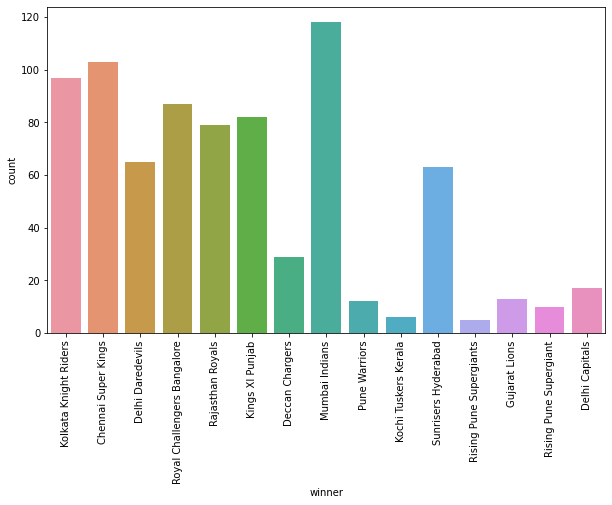

In [92]:
print(d['winner'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x=d['winner'])
plt.xticks(rotation=90)
plt.show()


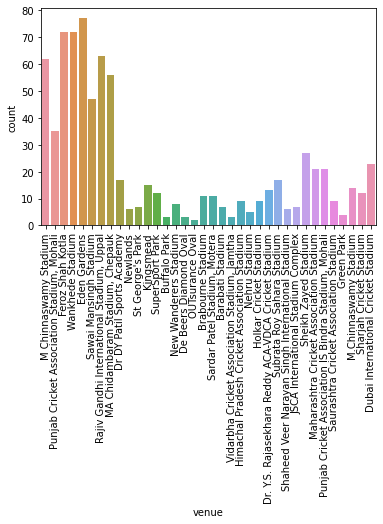

In [98]:
sns.countplot('venue', data=d)
plt.xticks(rotation='vertical')
plt.show()


## piechart

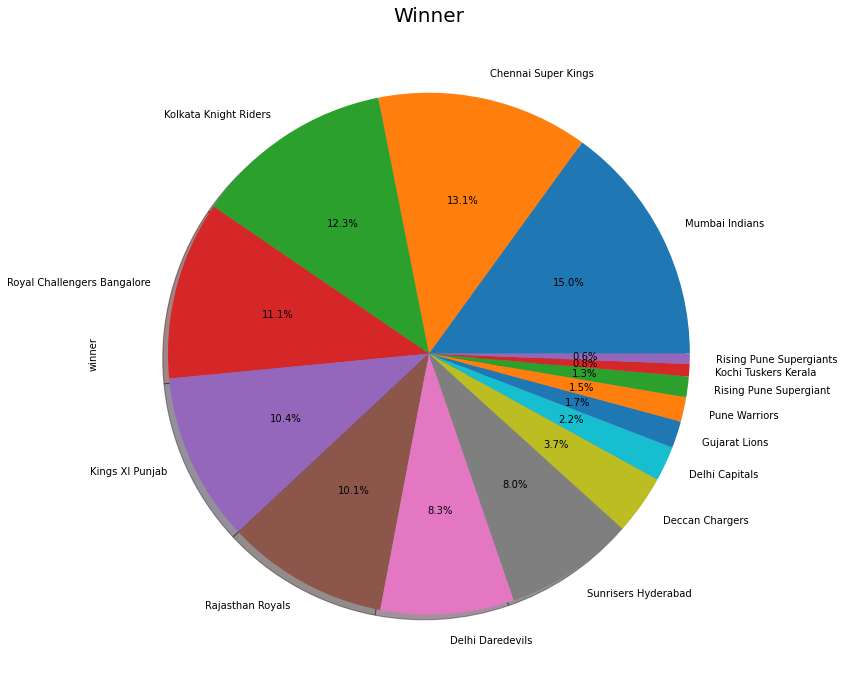

In [93]:
plt.title('Winner',fontsize=20)
d['winner'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(12,12))
plt.show()

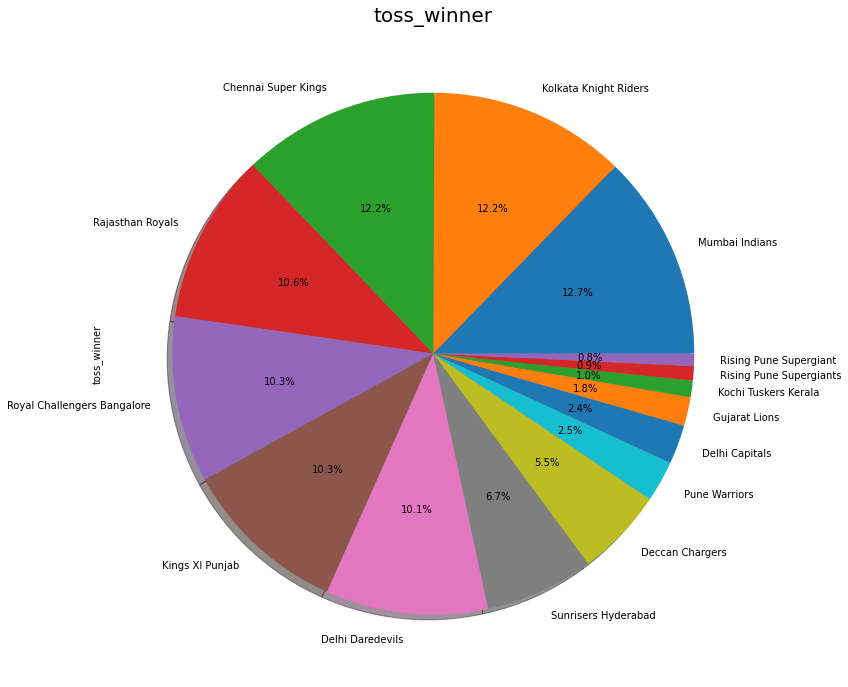

In [99]:
plt.title('toss_winner',fontsize=20)
d['toss_winner'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(22,12))
plt.show()


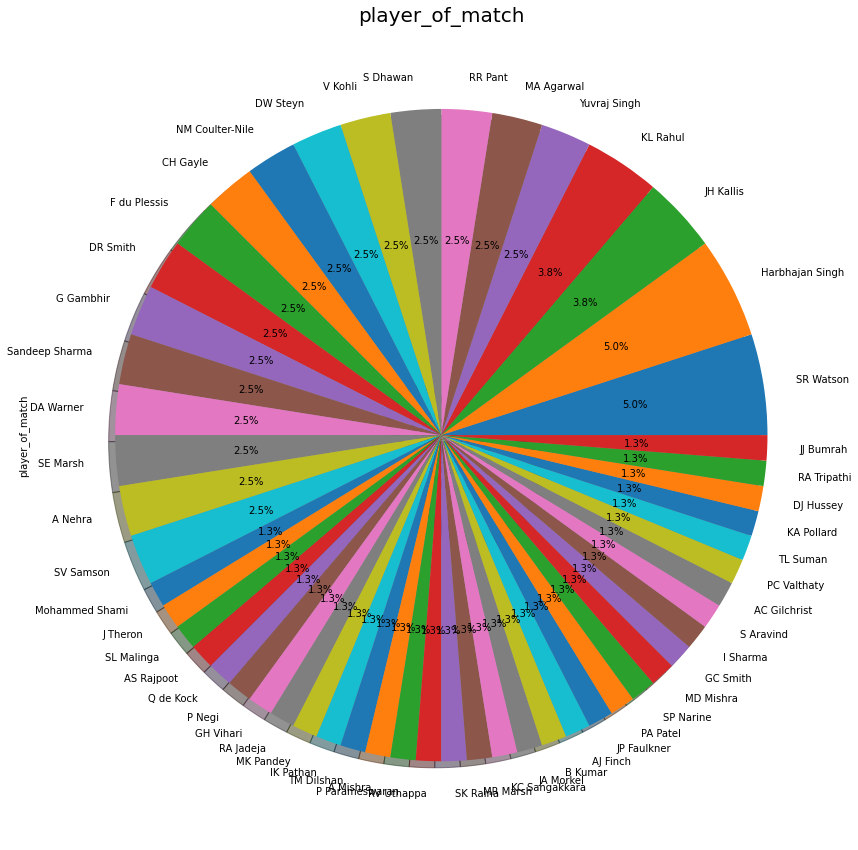

In [7]:
d1=d.sample(80)
plt.figure(figsize=(25,15))
plt.title('player_of_match',fontsize=20)
d1['player_of_match'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()


## Barplot

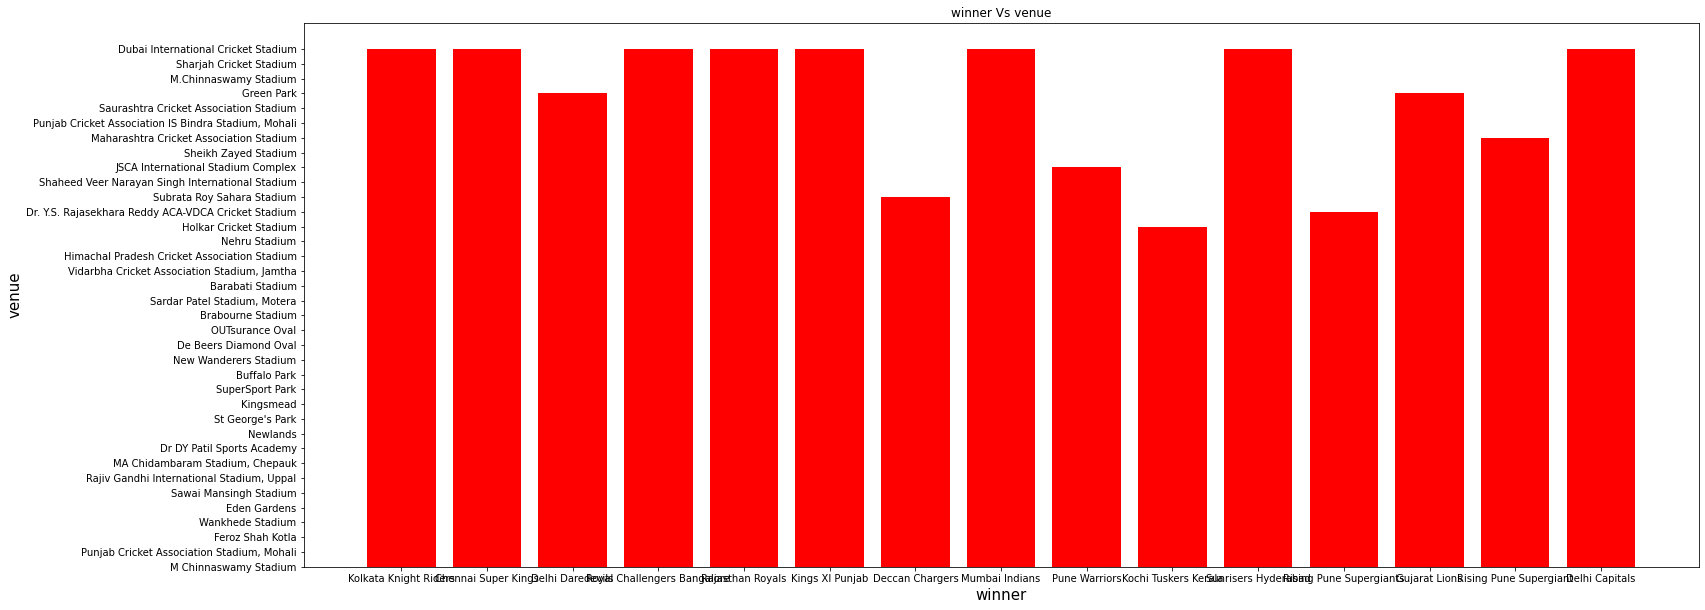

In [95]:
plt.figure(figsize=(25,10))
plt.bar(d['winner'],d['venue'],color='red')
plt.title('winner Vs venue')
plt.xlabel('winner',fontsize=15)
plt.ylabel('venue',fontsize=15)
plt.show()


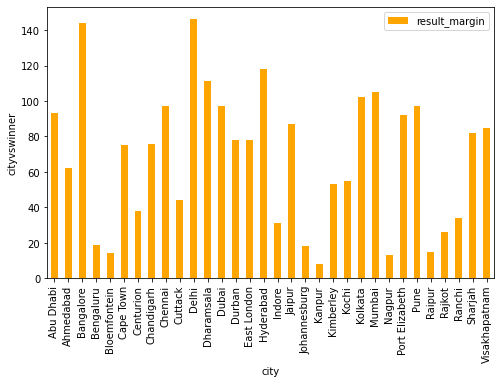

In [107]:
d.groupby('city')[['result_margin']].max().plot.bar(color=['orange'],figsize=(8,5))
plt.ylabel('cityvswinner')
plt.show()


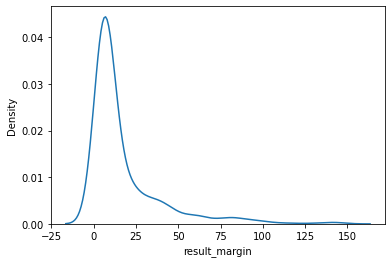

In [101]:
sns.kdeplot(d['result_margin'])
plt.show()


## violinplot

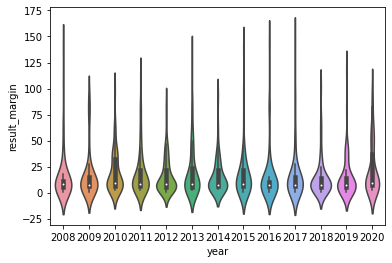

In [108]:
sns.violinplot(x='year',y='result_margin',data=d)
plt.show()


## pairplot

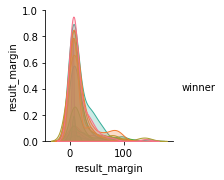

In [18]:
sns.pairplot(d, hue='winner')

## Histogram

array([[<AxesSubplot:title={'center':'result_margin'}>]], dtype=object)

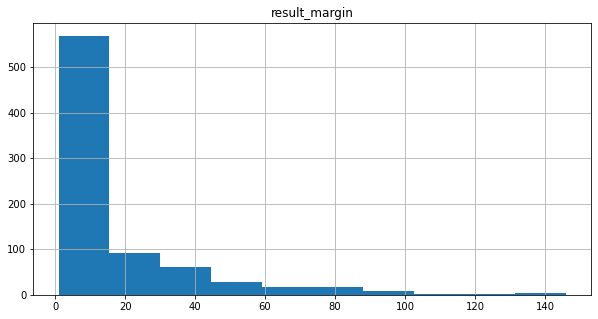

In [17]:
d.hist(figsize=(10,5))

#                                         Conclusion

- Chasing is the most common decision every team mostly prefers in IPL.
- There are a few instances that choose to bat as well, depending on the condition & pitch. 
- During night matches wet outfield play a major role so most of the team prefer batting second in IPL.  


